In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set the download root and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch and load the data
fetch_housing_data()
housing_data = load_housing_data()

# Select relevant features: longitude, latitude, and median_income
housing_set= housing_data[['longitude', 'latitude', 'median_income']]

# Normalize the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_set)




K-Means

In [2]:
# Apply K-Means clustering
k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(housing_scaled)

# Add the cluster assignments to the housing_set DataFrame
housing_set['cluster'] = y_pred #This line adds cluster assignments to the DataFrame


y_pred

<ipython-input-2-4a0d2ba6ef4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_set['cluster'] = y_pred #This line adds cluster assignments to the DataFrame


array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

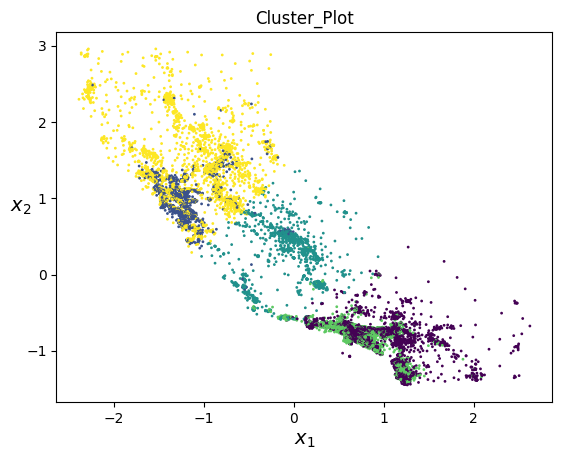

In [3]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)


# Calling the plot_clusters function with housing_scaled and y_pred
plot_clusters(housing_scaled, y_pred) # Passing housing_scaled as X and y_pred as y
plt.title("Cluster_Plot")
plt.show()

In [4]:
y_pred is kmeans.labels_


True

In [5]:
kmeans.cluster_centers_

array([[ 0.86000421, -0.84755429, -0.40163141],
       [-1.19861317,  0.95722737,  1.21992137],
       [-0.07890855,  0.21343285, -0.62118909],
       [ 0.75613508, -0.82736641,  1.38323368],
       [-1.16541903,  1.24407729, -0.46281661]])

In [6]:
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

In [7]:
import numpy as np # Import the numpy library and give it the alias 'np'

# Define X_new with 3 features to match the training data
X_new = np.array([[0, 2, 1], [3, 2, 2], [-3, 3, 1.5], [-3, 2.5, 2]])
# Now X_new has 3 features, simulating longitude, latitude, and median_income

# Make predictions
kmeans.predict(X_new)

array([1, 3, 1, 1], dtype=int32)

 Clustering in Original Data

<ipython-input-8-f16664fe2990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_set['cluster'] = kmeans.labels_ # Assign cluster labels to a new 'cluster' column


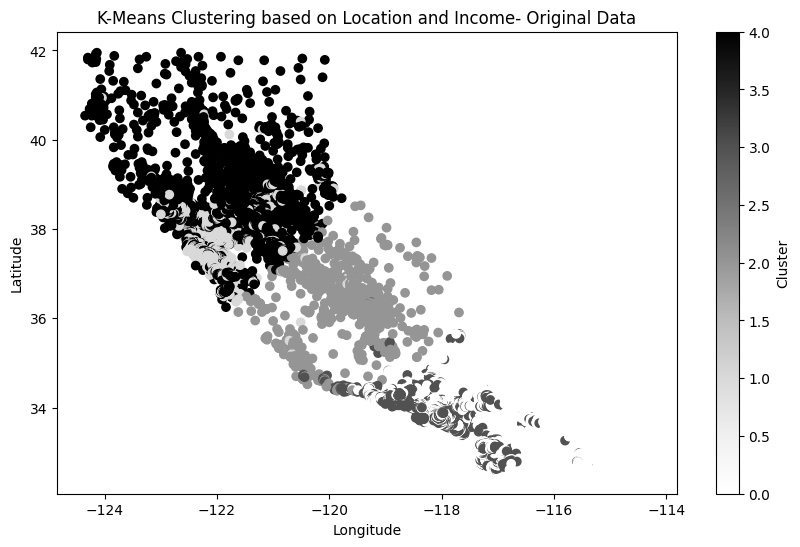

In [8]:
import matplotlib.pyplot as plt

housing_set= housing_data[['longitude', 'latitude', 'median_income']]
# Assuming kmeans is your fitted KMeans model
housing_set['cluster'] = kmeans.labels_ # Assign cluster labels to a new 'cluster' column

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(housing_set['longitude'], housing_set['latitude'], c=housing_set['cluster'], cmap='Greys', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering based on Location and Income- Original Data')
plt.show()

 Clustering using scaled data

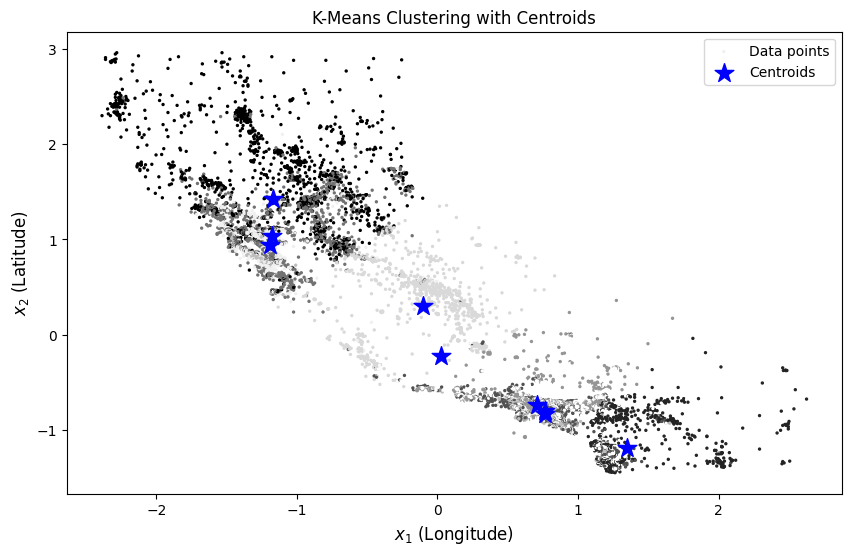

In [9]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you already have housing_scaled and y_pred from your previous steps

# Function to plot clusters and centroids
def plot_clusters_with_centroids(X, y_pred, centroids):
    plt.figure(figsize=(10, 6))

    # Plot the data points, colored by cluster
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=2, cmap='Greys', alpha=1, label='Data points')

    # Plot the centroids as larger, distinct markers
    plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, marker='*', label='Centroids')

    plt.xlabel("$x_1$ (Longitude)", fontsize=12)
    plt.ylabel("$x_2$ (Latitude)", fontsize=12)
    plt.title("K-Means Clustering with Centroids")
    plt.legend()
    plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
y_pred = kmeans.fit_predict(housing_scaled)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Call the plot function to show clusters and centroids
plot_clusters_with_centroids(housing_scaled, y_pred, centroids)


In [10]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the download root and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch and load the data
fetch_housing_data()
housing_data = load_housing_data()

# Check the data loaded
print("Housing Data Shape:", housing_data.shape)
print("Housing Data Columns:", housing_data.columns)

# Select relevant features: longitude, latitude, and median_income
housing_set = housing_data[['longitude', 'latitude', 'median_income']]

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(housing_set)  # This is your X (dataset)

# Check the scaled data
print("Scaled Data Shape:", X.shape)

# Train KMeans models for different numbers of clusters (k) and store them
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 10)]

# Calculate silhouette scores for each kmeans model in kmeans_per_k
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Check silhouette scores
print("Silhouette Scores:", silhouette_scores)


Housing Data Shape: (20640, 10)
Housing Data Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Scaled Data Shape: (20640, 3)
Silhouette Scores: [0.5482304452184799, 0.5179721838532693, 0.43517979770599646, 0.4100830999013529, 0.3984653534071962, 0.37225184832846725, 0.3666693541000338, 0.34617328321860785]


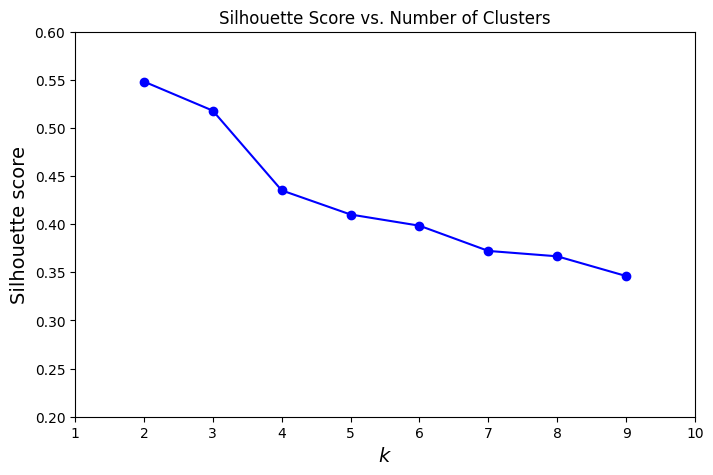

In [11]:
# Plot silhouette scores against the number of clusters (k)
plt.figure(figsize=(8, 5))
# Change the x-axis range to match the number of silhouette scores
plt.plot(range(2, 10), silhouette_scores, "bo-")  # k starts at 2, goes up to 9
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1, 10, 0.2, 0.6])
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

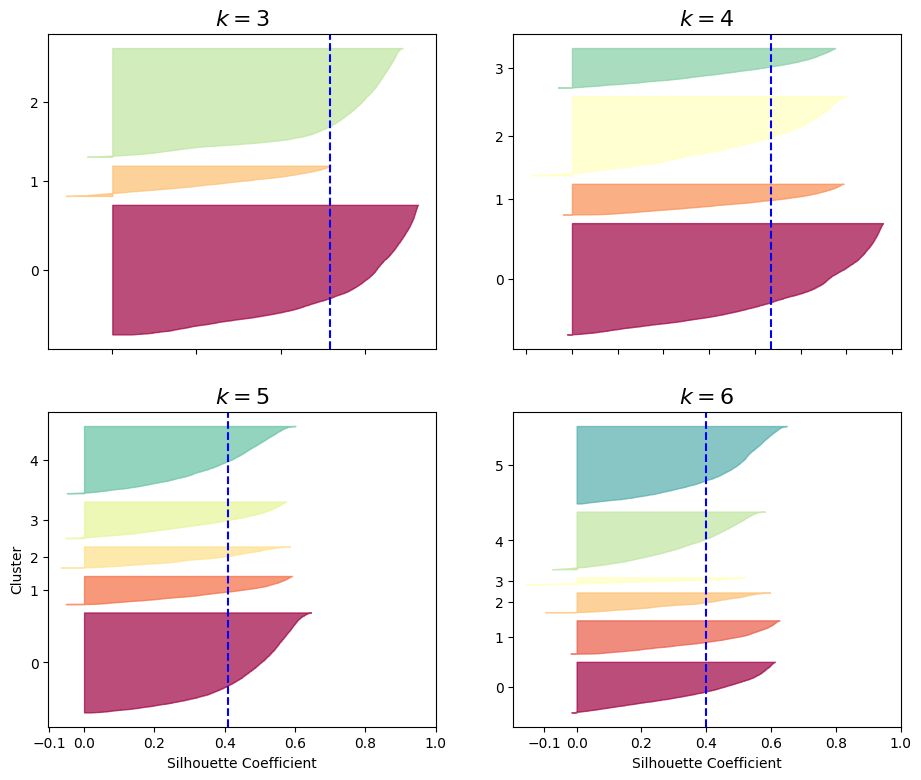

In [12]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # Import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

# Silhouette analysis plot for k = 3, 4, 5, 6
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):  # Loop through different values of k
    plt.subplot(2, 2, k - 2)  # Create a 2x2 grid of subplots

    y_pred = kmeans_per_k[k - 2].labels_  # Get cluster labels for the current k
    silhouette_coefficients = silhouette_samples(X, y_pred)  # Compute silhouette coefficients for each point

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]  # Get silhouette scores for cluster i
        coeffs.sort()  # Sort silhouette coefficients for a cleaner plot

        color = mpl.cm.Spectral(i / k)  # Set color from the 'Spectral' colormap
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Set y-axis ticks and labels
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (2, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Plot the average silhouette score for the current k with a red dashed line
    plt.axvline(x=silhouette_scores[k - 2], color="blue", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


For n_clusters = 2, the silhouette score is 0.5482304452184799
For n_clusters = 3, the silhouette score is 0.5179721838532693
For n_clusters = 4, the silhouette score is 0.43517979770599646
For n_clusters = 5, the silhouette score is 0.4100830999013529
For n_clusters = 6, the silhouette score is 0.3984653534071962
For n_clusters = 7, the silhouette score is 0.37225184832846725
For n_clusters = 8, the silhouette score is 0.3666693541000338
For n_clusters = 9, the silhouette score is 0.34617328321860785
For n_clusters = 10, the silhouette score is 0.35372734784052684


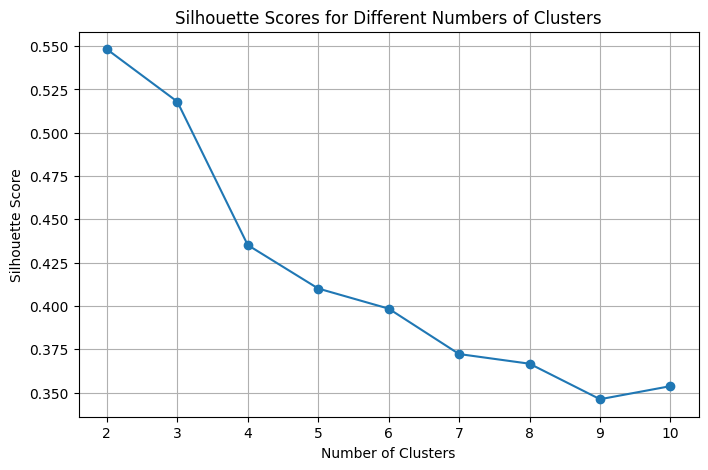

In [13]:
import os
import tarfile
import urllib.request
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the download root and paths
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Function to fetch housing data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# Function to load housing data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch and load the data
fetch_housing_data()
housing_data = load_housing_data()

# Select relevant features: longitude, latitude, and median_income
housing_subset = housing_data[['longitude', 'latitude', 'median_income']]

# Normalize the data
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_subset)

# List to store silhouette scores
silhouette_scores = []

# Test K-Means for different numbers of clusters
cluster_range = range(2, 11)  # from 2 to 10 clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(housing_scaled)

    # Calculate the silhouette score
    score = silhouette_score(housing_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {score}')

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


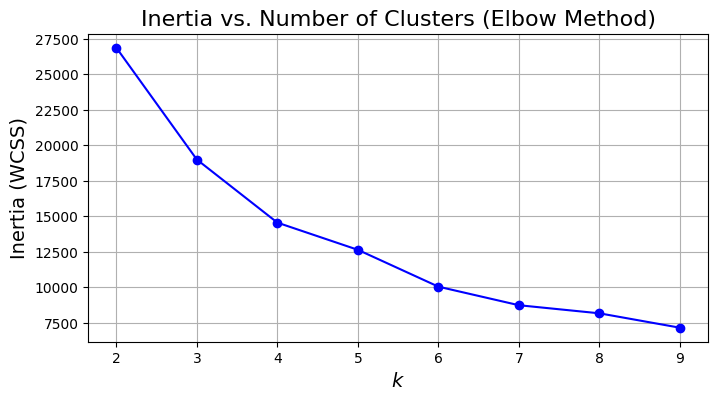

In [15]:
# Calculate inertia (WCSS) and silhouette scores for each k
inertia = []
silhouette_scores = []

k_values = range(2, 10)  # k values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia (WCSS)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)  # Silhouette score

# Plot inertia (elbow method)
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia (WCSS)', fontsize=14)
plt.title('Inertia vs. Number of Clusters (Elbow Method)', fontsize=16)
plt.grid(True)
plt.show()


In [42]:
housing_set['cluster'] = kmeans.labels_ + 2  # Shift cluster labels to start from 2
cluster_distribution = housing_set['cluster'].value_counts()
print(cluster_distribution)


cluster
2     4145
6     3847
7     3345
10    2877
8     1658
4     1585
9     1442
3     1402
5      339
Name: count, dtype: int64


In [46]:

housing_set['cluster'] = kmeans.labels_ + 2

# Calculate the median for each cluster
cluster_medians = housing_set.groupby('cluster').median()

print(cluster_medians)


         longitude  latitude  median_income
cluster                                    
2          -118.06     33.96        4.29170
3          -122.03     37.59        6.13590
4          -119.74     36.36        2.54370
5          -118.46     34.12       10.92010
6          -118.21     34.04        2.58060
7          -122.03     37.76        3.99340
8          -118.02     33.89        6.42655
9          -117.08     32.80        2.64160
10         -121.89     38.51        2.37500


In [47]:
cluster_medians = housing_set.groupby('cluster')[['median_income', 'longitude', 'latitude']].median()

print(cluster_medians)


         median_income  longitude  latitude
cluster                                    
2              4.29170    -118.06     33.96
3              6.13590    -122.03     37.59
4              2.54370    -119.74     36.36
5             10.92010    -118.46     34.12
6              2.58060    -118.21     34.04
7              3.99340    -122.03     37.76
8              6.42655    -118.02     33.89
9              2.64160    -117.08     32.80
10             2.37500    -121.89     38.51


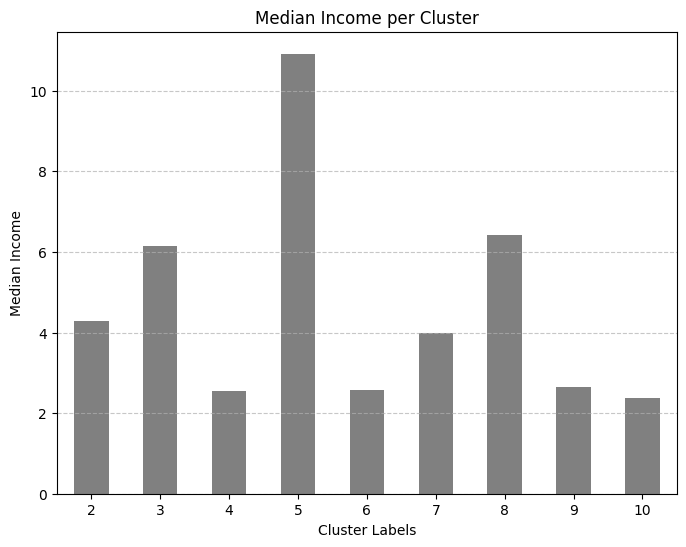

In [49]:
import matplotlib.pyplot as plt

housing_set['cluster'] = kmeans.labels_ + 2

# Calculate the median for median_income per cluster
cluster_median_income = housing_set.groupby('cluster')['median_income'].median()

# Plotting
plt.figure(figsize=(8, 6))
cluster_median_income.plot(kind='bar', color='gray')

plt.title('Median Income per Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Median Income')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


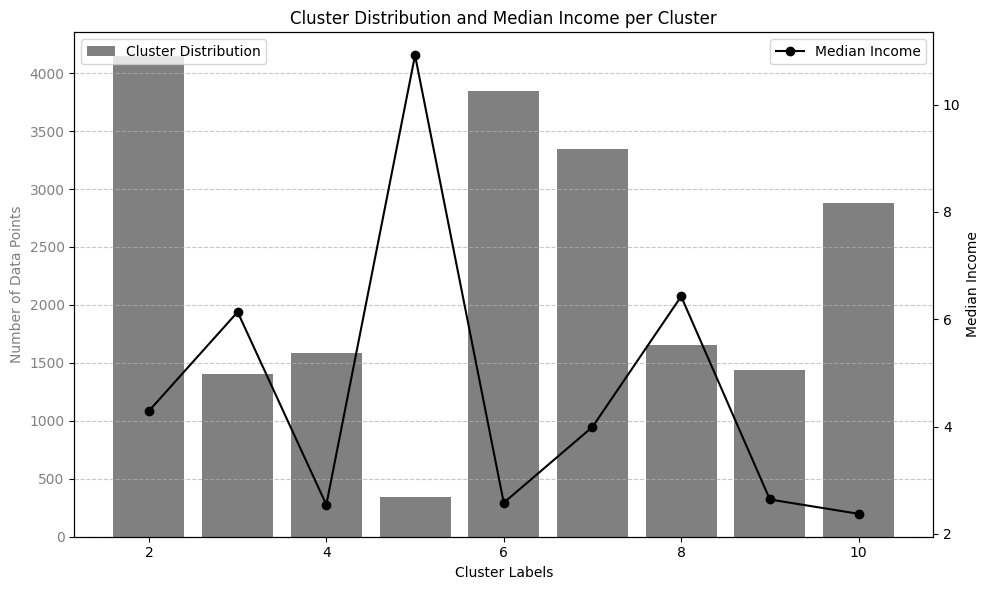

In [54]:
import matplotlib.pyplot as plt

housing_set['cluster'] = kmeans.labels_ + 2

# Calculate the cluster distribution and median income per cluster
cluster_distribution = housing_set['cluster'].value_counts().sort_index()
cluster_median_income = housing_set.groupby('cluster')['median_income'].median()

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the cluster distribution on the left y-axis
ax1.bar(cluster_distribution.index, cluster_distribution.values, color='gray', label='Cluster Distribution')
ax1.set_xlabel('Cluster Labels')
ax1.set_ylabel('Number of Data Points', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# Create the second y-axis for median income
ax2 = ax1.twinx()
ax2.plot(cluster_median_income.index, cluster_median_income.values, color='black', marker='o', label='Median Income')
ax2.set_ylabel('Median Income', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and layout adjustments
plt.title('Cluster Distribution and Median Income per Cluster')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()  # To ensure everything fits well
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()
